In [6]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [56]:
root = "../data/"
dat = pd.read_csv(root + "SADCQ.csv").sort_values("year")
dat2 = pd.read_csv(root + "Economic_Data.csv").sort_values("Year")
#datN = pd.read_csv(root + "SADCQN.csv").sort_values("year")
#dat_MS = pd.read_csv(root + "SADCQ_MS.csv").sort_values("year")
#datN_MS = pd.read_csv(root + "SADCQN_MS.csv").sort_values("year")
#stateCounty = pd.read_csv(root + "state_county.csv").set_index("State")

In [14]:
# Reformed the "Economic_Data.csv" file
#dat2 = dat2.loc[:, ~dat2.isna().all()]
#dat2 = dat2.iloc[:,:-1]
#
#newNames = {'Palm Beach County (FL)' : 'Palm Beach County, FL (PB)', 
#            'Richmond County (NY)' : 'Borough of Staten Island, NY (NYK)',
#            'Queens County (NY)' : 'Borough of Queens, NY (NYJ)', 
#            'New York County (NY)' : 'Borough of Manhattan, NY (NYI)',
#            'Kings County (NY)' : 'Borough of Brooklyn, NY (NYH)',
#            'Bronx County (NY)' : 'Borough of Bronx, NY (NYG)', 
#            'Cook County (IL)' : 'Chicago, IL (CH)',
#            'Orange County (FL)' : 'Orange County, FL (OL)',
#            'Miami-Dade County (FL)' : 'Miami-Dade County, FL (MM)',
#            'Broward County (FL)' : 'Broward County, FL (FT)',
#            'San Francisco County (CA)' : 'San Francisco, CA (SF)',
#            'San Diego County (CA)' : 'San Diego, CA (SA)',
#            'Philadelphia County (PA)' : 'Philadelphia, PA (PH)',
#            'Los Angeles County (CA)' : 'Los Angeles, CA (LO)'}
#dat2["State / County Name"] = dat2["State / County Name"].replace(newNames)
#
#dat2.to_csv("Economic_Data.csv")
# resave data
#dat2 = dat2.iloc[:,1:]
#dat2.to_csv(root + "Economic_Data.csv", index=False)

In [3]:
dat.columns

Index(['sitecode', 'sitename', 'year', 'survyear', 'weight', 'stratum', 'PSU',
       'record', 'age', 'sex', 'grade', 'race4', 'race7', 'stheight',
       'stweight', 'bmi', 'bmipct', 'qnobese', 'qnowt', 'q66', 'q65', 'sexid',
       'sexid2', 'sexpart', 'sexpart2', 'q8', 'q9', 'q12', 'q13', 'q15', 'q16',
       'q17', 'q18', 'q19', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q32',
       'q33', 'q38', 'q40', 'q41', 'q45', 'q46', 'q47', 'q50', 'q51', 'q52',
       'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62',
       'q63', 'q64', 'q67', 'q68', 'q69', 'q70', 'q71', 'q72', 'q73', 'q74',
       'q76', 'q79', 'q81', 'q82', 'q87', 'q89', 'qcigschool',
       'qalcoholschool', 'qmarijuanaschool', 'qtaughtHIV'],
      dtype='object')

In [4]:
dat.head()

,sitecode,sitename,year,survyear,weight,stratum,PSU,record,age,sex,...,q76,q79,q81,q82,q87,q89,qcigschool,qalcoholschool,qmarijuanaschool,qtaughtHIV
0,NYI,"Borough of Manhattan, NY (NYI)",2003,7,20.5124,8,2,1057158,7.0,2.0,...,2.0,7.0,2.0,2.0,NaN,7.0,1.0,2.0,1.0,2.0
18227,NYI,"Borough of Manhattan, NY (NYI)",2003,7,8.6800,5,1,1057147,7.0,2.0,...,2.0,5.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0
18226,NYK,"Borough of Staten Island, NY (NYK)",2003,7,11.6250,7,4,1780168,5.0,1.0,...,3.0,6.0,6.0,2.0,NaN,1.0,2.0,1.0,1.0,1.0
18225,NYI,"Borough of Manhattan, NY (NYI)",2003,7,34.2076,2,3,1231543,3.0,1.0,...,1.0,6.0,5.0,1.0,NaN,3.0,1.0,1.0,1.0,1.0
18224,NYI,"Borough of Manhattan, NY (NYI)",2003,7,13.6077,8,2,1057156,7.0,2.0,...,2.0,6.0,6.0,2.0,NaN,2.0,1.0,1.0,1.0,1.0


In [16]:
dat2.columns

Index(['Year', 'State / County Name', 'All Ages SAIPE Poverty Universe',
       'All Ages in Poverty Count', 'All Ages in Poverty Percent',
       'Under Age 18 SAIPE Poverty Universe', 'Under Age 18 in Poverty Count',
       'Under Age 18 in Poverty Percent',
       'Ages 5 to 17 in Families SAIPE Poverty Universe',
       'Ages 5 to 17 in Families in Poverty Count',
       'Ages 5 to 17 in Families in Poverty Percent',
       'Median Household Income in Dollars', 'Unemployment Rate', 'Population',
       'SNAP($/Person)'],
      dtype='object')

In [17]:
dat2.head()

,Year,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Percent,Under Age 18 SAIPE Poverty Universe,Under Age 18 in Poverty Count,Under Age 18 in Poverty Percent,Ages 5 to 17 in Families SAIPE Poverty Universe,Ages 5 to 17 in Families in Poverty Count,Ages 5 to 17 in Families in Poverty Percent,Median Household Income in Dollars,Unemployment Rate,Population,SNAP($/Person)
0,2003,"Palm Beach County, FL (PB)","1,226,256","133,704",10.9,"270,623","43,091",15.9,"193,668","28,380",14.7,"$43,014",4.2,1218100,79.05
13,2003,"Orange County, FL (OL)","970,511","128,263",13.2,"255,604","48,619",19.0,"178,251","30,768",17.3,"$40,671",3.8,202687,79.05
12,2003,"Los Angeles, CA (LO)","9,801,990","1,729,767",17.6,"2,720,905","693,408",25.5,"1,948,372","486,099",24.9,"$41,544",7.1,9767145,88.07
11,2003,"Philadelphia, PA (PH)","1,436,501","290,628",20.2,"369,447","106,273",28.8,"261,753","70,931",27.1,"$30,517",6.7,1493802,79.56
9,2003,"Broward County, FL (FT)","1,739,081","217,958",12.5,"430,317","75,002",17.4,"306,884","50,166",16.3,"$42,673",4.0,1707543,79.05


In [41]:
fulldat = dat.merge(dat2, how='left', left_on=["year", "sitename"], right_on=["Year", "State / County Name"])

In [42]:
fulldat = fulldat.sort_values(["year", "sitename"]).set_index(["year", "sitename"])

In [93]:
fulldat.reset_index()["sitename"].unique()

array(['Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Broward County, FL (FT)',
       'Chicago, IL (CH)', 'Los Angeles, CA (LO)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Orange County, FL (OL)', 'Palm Beach County, FL (PB)',
       'Philadelphia, PA (PH)', 'San Diego, CA (SA)',
       'San Francisco, CA (SF)'], dtype=object)

In [43]:
fulldat

sitecode  survyear   weight  stratum  PSU  \
year sitename                                                               
2003 Borough of Bronx, NY (NYG)      NYG         7  21.1753        6    3   
     Borough of Bronx, NY (NYG)      NYG         7  23.5162       11    1   
     Borough of Bronx, NY (NYG)      NYG         7  31.5801        6    1   
     Borough of Bronx, NY (NYG)      NYG         7  33.0296        7    4   
     Borough of Bronx, NY (NYG)      NYG         7  23.5798        6    3   
...                                  ...       ...      ...      ...  ...   
2019 San Francisco, CA (SF)           SF        15   2.3352        4    1   
     San Francisco, CA (SF)           SF        15   1.9567        1   11   
     San Francisco, CA (SF)           SF        15  14.3620        6    9   
     San Francisco, CA (SF)           SF        15  13.0612        6    3   
     San Francisco, CA (SF)           SF        15  13.5934        7    3   

                                  record  age  sex  grade  race4  ...  \
year sitename                                                     ...   
2003 Borough of Bronx, NY (NYG)   876328  6.0  2.0    4.0    3.0  ...   
     Borough of Bronx, NY (NYG)  2042100  6.0  1.0    4.0    2.0  ...   
     Borough of Bronx, NY (NYG)  2210245  7.0  1.0    4.0    3.0  ...   
     Borough of Bronx, NY (NYG)  2042097  6.0  1.0    3.0    3.0  ...   
     Borough of Bronx, NY (NYG)  2210244  7.0  1.0    4.0    3.0  ...   
...                                  ...  ...  ...    ...    ...  ...   
2019 San Francisco, CA (SF)      2079189  6.0  1.0    4.0    3.0  ...   
     San Francisco, CA (SF)      2079188  6.0  1.0    3.0    2.0  ...   
     San Francisco, CA (SF)       372148  4.0  2.0    2.0    4.0  ...   
     San Francisco, CA (SF)      1074293  7.0  2.0    3.0    4.0  ...   
     San Francisco, CA (SF)      1074294  7.0  2.0    4.0    4.0  ...   

                                 Under Age 18 SAIPE Poverty Universe  \
year sitename                                                          
2003 Borough of Bronx, NY (NYG)                              396,990   
     Borough of Bronx, NY (NYG)                              396,990   
     Borough of Bronx, NY (NYG)                              396,990   
     Borough of Bronx, NY (NYG)                              396,990   
     Borough of Bronx, NY (NYG)                              396,990   
...                                                              ...   
2019 San Francisco, CA (SF)                                  114,872   
     San Francisco, CA (SF)                                  114,872   
     San Francisco, CA (SF)                                  114,872   
     San Francisco, CA (SF)                                  114,872   
     San Francisco, CA (SF)                                  114,872   

                                 Under Age 18 in Poverty Count  \
year sitename                                                    
2003 Borough of Bronx, NY (NYG)                        148,488   
     Borough of Bronx, NY (NYG)                        148,488   
     Borough of Bronx, NY (NYG)                        148,488   
     Borough of Bronx, NY (NYG)                        148,488   
     Borough of Bronx, NY (NYG)                        148,488   
...                                                        ...   
2019 San Francisco, CA (SF)                             10,670   
     San Francisco, CA (SF)                             10,670   
     San Francisco, CA (SF)                             10,670   
     San Francisco, CA (SF)                             10,670   
     San Francisco, CA (SF)                             10,670   

                                 Under Age 18 in Poverty Percent  \
year sitename                                                      
2003 Borough of Bronx, NY (NYG)                             37.4   
     Borough of Bronx, NY (NYG)                             37.4   
     Borough

In [7]:
carRiskqs = ["q8", "q9"]
violenceqs = ["q12", "q13", "q15",
              "q16", "q17", "q18"]
sexqs = ["q19", "q58", "q59",
         "q60", "q61", "q62", 
         "q63", "q64", "qtaughtHIV"]
suicideqs = ["q25", "q26", "q27", 
             "q28", "q29"]
drugqs = ["q30", "q32", "q33",
          "q38", "q40", "q41",
          "q45", "q46", "q47",
          "q50", "q51", "q52",
          "q53", "q54", "q55",
          "q56", "q57", "qcigschool",
          "qalcoholschool", "qmarijuanaschool"]
selfqs = ["q65", "q66", "q67",
          "q68", "q89", "qnowt",
          "qnobese", "bmipct", "bmi",
          "sexpart", "sexpart2", "sexed",
          "sexid2", "stheight", "stweight",
          "race4", "race7", "sex",
          "age", "grade"]
selfHealthqs = ["q69", "q70", "q71",
                "q72", "q73", "q74",
                "q76", "q79", "q81",
                "q82", "q87"]

In [35]:
fulldat.reset_index().groupby(["year", "sitename"])["sitecode"].count().describe()

count      131.000000
mean      2347.374046
std       2045.719382
min        938.000000
25%       1465.000000
50%       1804.000000
75%       2322.000000
max      11887.000000
Name: sitecode, dtype: float64

In [44]:
# finds survey reponders that answered none of the violence questions and drops them
fulldat = fulldat.loc[~fulldat[violenceqs].isna().all(axis=1),]

In [45]:
fulldat.reset_index().groupby(["year", "sitename"])["sitecode"].count().describe()

count      131.000000
mean      2342.755725
std       2038.163235
min        938.000000
25%       1463.000000
50%       1797.000000
75%       2318.500000
max      11868.000000
Name: sitecode, dtype: float64

In [39]:
fulldat.loc[fulldat[violenceqs].isna().any(axis=1),][violenceqs]

q12  q13  q15  q16  q17  q18
year sitename                                                
2003 Borough of Bronx, NY (NYG)  2.0  2.0  1.0  1.0  NaN  1.0
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  NaN  1.0  1.0
     Borough of Bronx, NY (NYG)  5.0  3.0  5.0  7.0  NaN  NaN
     Borough of Bronx, NY (NYG)  1.0  1.0  4.0  1.0  NaN  NaN
     Borough of Bronx, NY (NYG)  1.0  1.0  3.0  2.0  NaN  NaN
...                              ...  ...  ...  ...  ...  ...
2019 San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      2.0  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0
     San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0

[129489 rows x 6 columns]

In [48]:
# using all question cols to impute, but not demo or econ data because its used to fit
qDat = fulldat[carRiskqs + violenceqs + sexqs +
               suicideqs + drugqs + selfHealthqs]

In [82]:
qDat = qDat.reindex(sorted(qDat.columns), axis=1)

In [83]:
qDat.loc[:,qDat.isna().any()]

q12  q13  q15  q16  q17  q18  q19  q25  q26  \
year sitename                                                                  
2003 Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  3.0  1.0  3.0  3.0  2.0  1.0  2.0   
     Borough of Bronx, NY (NYG)  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0   
...                              ...  ...  ...  ...  ...  ...  ...  ...  ...   
2019 San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      2.0  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      1.0  1.0  NaN  1.0  1.0  1.0  2.0  2.0  2.0   
     San Francisco, CA (SF)      NaN  1.0  NaN  1.0  1.0  1.0  2.0  1.0  2.0   

                                 q27  ...  q79   q8  q81  q82  q87   q9  \
year sitename                         ...                                 
2003 Borough of Bronx, NY (NYG)  2.0  ...  5.0  2.0  1.0  2.0  NaN  3.0   
     Borough of Bronx, NY (NYG)  2.0  ...  6.0  4.0  6.0  3.0  NaN  1.0   
     Borough of Bronx, NY (NYG)  2.0  ...  5.0  5.0  6.0  1.0  NaN  1.0   
     Borough of Bronx, NY (NYG)  2.0  ...  7.0  5.0  6.0  3.0  NaN  1.0   
     Borough of Bronx, NY (NYG)  2.0  ...  5.0  5.0  6.0  3.0  NaN  1.0   
...                              ...  ...  ...  ...  ...  ...  ...  ...   
2019 San Francisco, CA (SF)      2.0  ...  NaN  2.0  NaN  NaN  2.0  3.0   
     San Francisco, CA (SF)      2.0  ...  NaN  4.0  NaN  NaN  2.0  1.0   
     San Francisco, CA (SF)      2.0  ...  NaN  4.0  NaN  NaN  2.0  1.0   
     San Francisco, CA (SF)      2.0  ...  NaN  5.0  NaN  NaN  2.0  1.0   
     San Francisco, CA (SF)      2.0  ...  NaN  3.0  NaN  NaN  2.0  1.0   

                                 qalcoholschool  qcigschool  qmarijuanaschool  \
year sitename                                                                   
2003 Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         2.0               1.0   
     Borough of Bronx, NY (NYG)             1.0         1.0               1.0   
...                                         ...         ...               ...   
2019 San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   
     San Francisco, CA (SF)                 1.0         1.0               1.0   

                                 qtaughtHIV  
year sitename                                
2003 Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
     Borough of Bronx, NY (NYG)         1.0  
...                                     ...  
2019 San Francisco, CA (SF)             2.0  
     San Francisco, CA (SF)             1.0  
     San Francisco, CA (SF)             1.0  
     San Francisco, CA (SF)             1.0  
     San Francisco, CA (SF)             2.0  

[306901 rows x 53 columns]

In [92]:
# applies impute functions for each of the (year, county) pairing
def imputeGroupby(dat, imp_type="mean"):
    allMissing = dat.loc[:, dat.isna().all()].columns.to_numpy()
    toImpuDat = dat.loc[:, ~dat.isna().all()]
    notAllMissing = toImpuDat.columns.to_numpy()
    
    if imp_type == "knn":
        # setting K to 1 percent of the data
        k = int(dat.shape[0] * .01)
        imputer = KNNImputer(n_neighbors=k)
    elif imp_type == "mean":
        imputer = SimpleImputer(strategy="mean")
    elif imp_type == "median":
        imputer = SimpleImputer(strategy="most_frequent")
    elif imp_type == "most_frequent":
        imputer = SimpleImputer(strategy="median")
    elif imp_type == "iter":
        imputer = IterativeImputer(random_state=9451)
        
    retDat = pd.DataFrame(imputer.fit_transform(toImpuDat.values))
    retDat.columns = notAllMissing
    retDat[allMissing] = np.nan
    return retDat.reindex(sorted(retDat.columns), axis=1)

meanImpu =(qDat.reset_index()
               .groupby(["year", "sitename"])
               .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
                                               imp_type="mean")))
medianImpu =(qDat.reset_index()
                 .groupby(["year", "sitename"])
                 .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
                                                 imp_type="median")))
mostImpu =(qDat.reset_index()
               .groupby(["year", "sitename"])
               .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
                                               imp_type="most_frequent")))
knnImpu =(qDat.reset_index()
              .groupby(["year", "sitename"])
              .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
                                              imp_type="knn")))
iterImpu =(qDat.reset_index()
               .groupby(["year", "sitename"])
               .apply(lambda x : imputeGroupby(x.iloc[:, 2:],
                                               imp_type="iter")))

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/

/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/home/berlands/anaconda3/envs/STATS507/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [5]:
#meanImpu.to_csv(root + "meanImputeVio.csv")
#medianImpu.to_csv(root + "medianImputeVio.csv")
#mostImpu.to_csv(root + "mostImputeVio.csv")
#knnImpu.to_csv(root + "knnImputeVio.csv")
#iterImpu.to_csv(root + "iterImputeVio.csv")
root = "../data/"
meanImpu = pd.read_csv(root + "meanImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
medianImpu = pd.read_csv(root + "medianImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
mostImpu = pd.read_csv(root + "mostImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
knnImpu = pd.read_csv(root + "knnImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]
#iterImpu = pd.read_csv(root + "iterImputeVio.csv").set_index(["year", "sitename"]).iloc[:,1:]

In [47]:
#question wieght 	ranking
#12	 1 (base)	1, 2, 3, 4, 6
#13	 2		1, 2, 3, 4, 6
#15	 .5		1, 2, 3, 4, 6
#16	 5		1, 2, 3, 4, 5, 6, 7, 9
#17	 3		1, 2, 3, 4, 5, 6, 7, 9
#18	 4		1, 2, 3, 4, 5, 6, 7, 9
def violenceScore(dat):
    n = dat.shape[0]
    dat = dat.loc[:, ~dat.isna().any()]
    score = 0
    satScore = 0
    for col in dat.columns:
        if col == "q12":
            w = 1
            dat[col].replace({5 : 6})
            score += (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q13":
            w = 2
            dat[col].replace({5 : 6})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q15":
            w = .5
            dat[col].replace({5 : 6})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 5
        elif col == "q16":
            w = 5
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        elif col == "q17":
            w = 3
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        elif col == "q18":
            w = 4
            dat[col].replace({8 : 9})
            score += w * (dat[col] - 1).sum()
            satScore += n * w * 8
        
    return 1000 * (score / satScore)

In [53]:
vioResponceKNN = pd.DataFrame(knnImpu[violenceqs].reset_index()
                                              .groupby(["year", "sitename"])
                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
vioResponceKNN.columns = ["violence score"]
#vioResponceMean = pd.DataFrame(knnImpu[violenceqs].reset_index()
#                                              .groupby(["year", "sitename"])
#                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
#vioResponceMean.columns = ["violence score"]
#vioResponceKNN = pd.DataFrame(knnImpu[violenceqs].reset_index()
#                                              .groupby(["year", "sitename"])
#                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
#vioResponceKNN.columns = ["violence score"]
#vioResponceKNN = pd.DataFrame(knnImpu[violenceqs].reset_index()
#                                              .groupby(["year", "sitename"])
#                                              .apply(lambda x : violenceScore(x.iloc[:,2:])))
#vioResponceKNN.columns = ["violence score"]

In [54]:
vioResponceKNN

violence score
year sitename                                          
2003 Borough of Bronx, NY (NYG)               50.403812
     Borough of Brooklyn, NY (NYH)            49.552546
     Borough of Manhattan, NY (NYI)           41.235028
     Borough of Queens, NY (NYJ)              45.586962
     Borough of Staten Island, NY (NYK)       51.828991
...                                                 ...
2019 Orange County, FL (OL)                   27.775767
     Palm Beach County, FL (PB)               32.756094
     Philadelphia, PA (PH)                    32.184674
     San Diego, CA (SA)                       17.109393
     San Francisco, CA (SF)                   26.902957

[131 rows x 1 columns]

In [64]:
vioKNN = (vioResponceKNN.reset_index()
                        .merge(dat2, how='inner',
                               left_on=["year", "sitename"],
                               right_on=["Year", "State / County Name"])
                        .drop(["Year", 
                               "State / County Name",
                               "Ages 5 to 17 in Families SAIPE Poverty Universe",
                               "Ages 5 to 17 in Families in Poverty Count",
                               "Ages 5 to 17 in Families in Poverty Percent",
                               "All Ages in Poverty Count",
                               "All Ages SAIPE Poverty Universe",
                               "Under Age 18 SAIPE Poverty Universe",
                               "Under Age 18 in Poverty Count"], axis=1))
#vioKNN.to_csv(root + "violenceKNN.csv")

In [4]:
root = "../data/"
vioKNN = pd.read_csv(root + "violenceKNN.csv").iloc[:, 1:]
vioKNN

,year,sitename,violence score,All Ages in Poverty Percent,Under Age 18 in Poverty Percent,Median Household Income in Dollars,Unemployment Rate,Population,SNAP($/Person)
0,2003,"Borough of Bronx, NY (NYG)",50.403812,26.9,37.4,"$27,855",9.9,1362373,97.29
1,2003,"Borough of Brooklyn, NY (NYH)",49.552546,23.4,33.3,"$30,672",8.1,2472999,97.29
2,2003,"Borough of Manhattan, NY (NYI)",41.235028,18.7,30.9,"$43,930",6.6,1562154,97.29
3,2003,"Borough of Queens, NY (NYJ)",45.586962,15.4,20.9,"$38,041",6.6,2214608,97.29
4,2003,"Borough of Staten Island, NY (NYK)",51.828991,10.1,13.7,"$54,252",6.7,455939,97.29
...,...,...,...,...,...,...,...,...,...
117,2019,"Orange County, FL (OL)",27.775767,12.6,17.9,"$63,133",2.8,"1,393,452",157.56
118,2019,"Palm Beach County, FL (PB)",32.756094,11.4,16.0,"$66,621",3.1,"1,496,770",157.56
119,2019,"Philadelphia, PA (PH)",32.184674,23.0,31.6,"$47,598",5.3,"1,584,064",150.88
120,2019,"San Diego, CA (SA)",17.109393,10.3,12.8,"$83,576",3.0,"3,338,330",151.10


In [23]:

vioKNN.convert_dtypes().dtypes

year                                    Int64
sitename                               string
violence score                        Float64
All Ages in Poverty Percent           Float64
Under Age 18 in Poverty Percent       Float64
Median Household Income in Dollars     string
Unemployment Rate                     Float64
Population                             string
SNAP($/Person)                        Float64
dtype: object

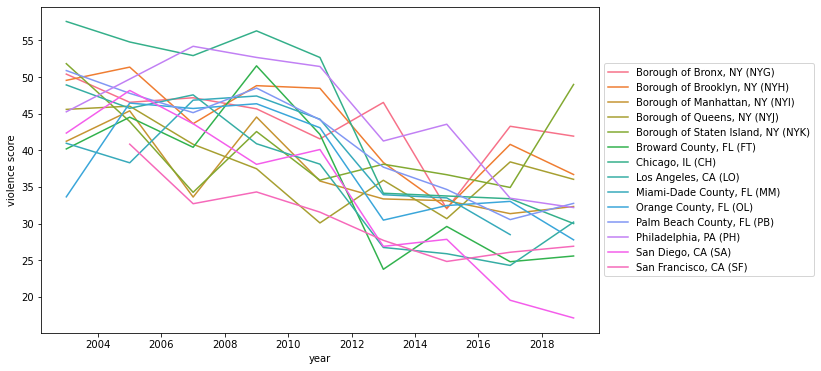

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

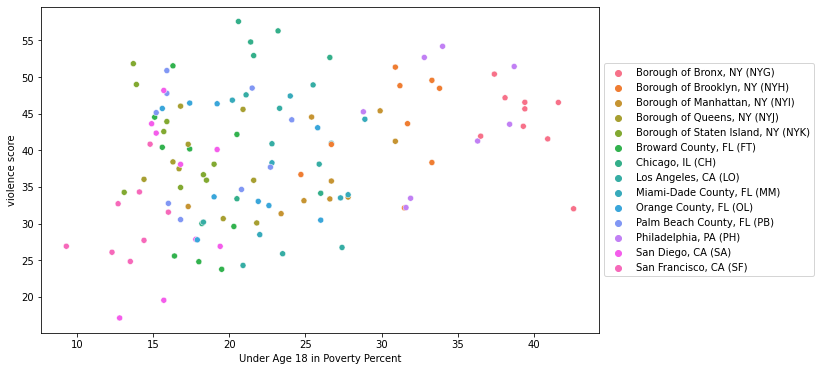

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Under Age 18 in Poverty Percent", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

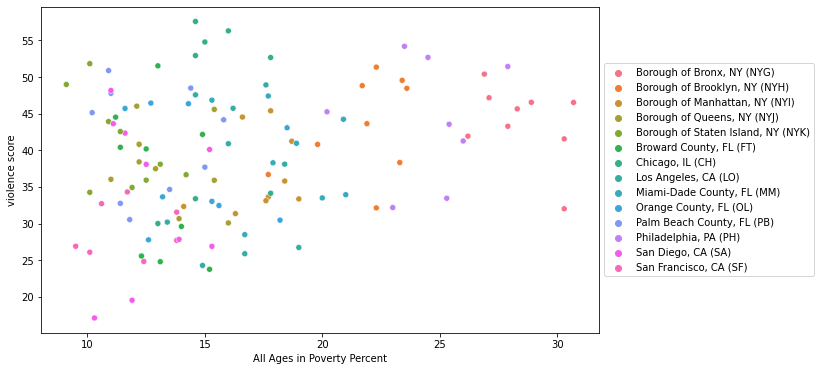

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="All Ages in Poverty Percent", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

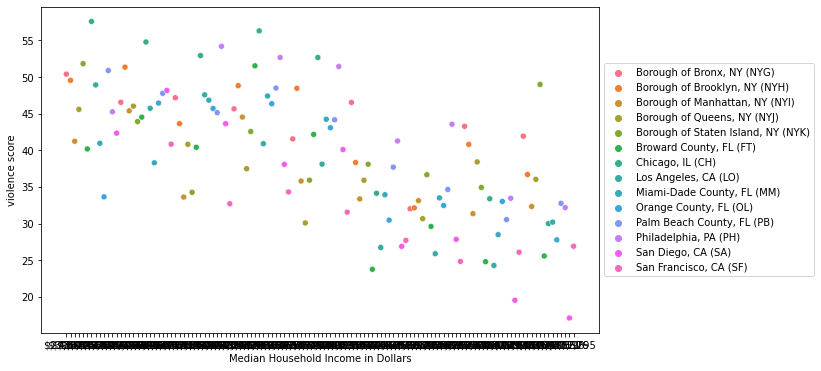

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Median Household Income in Dollars", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

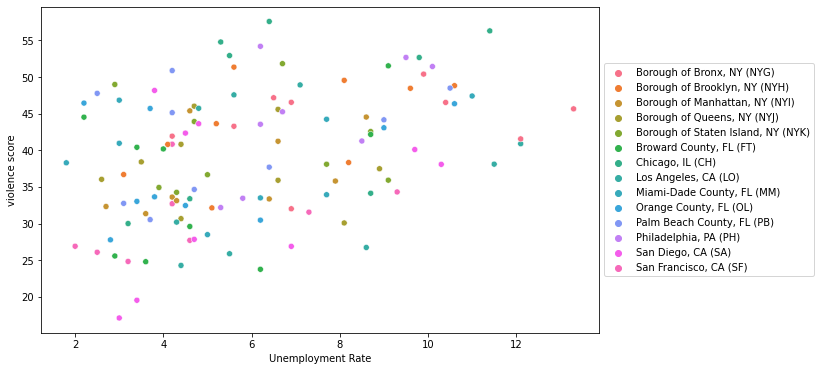

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Unemployment Rate", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

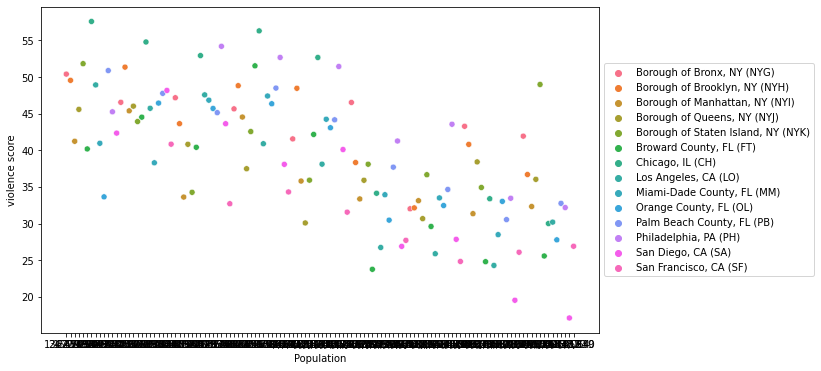

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Population", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

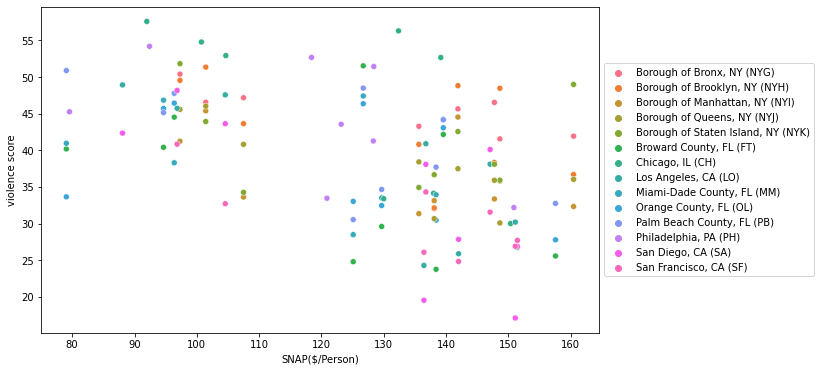

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SNAP($/Person)", y="violence score", hue="sitename", data=vioKNN)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
knnImpu.loc[knnImpu[violenceqs].isna().any(axis=1), violenceqs].reset_index()["sitename"].unique()

array(['Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'New York City, NY (NYC)',
       'Chicago, IL (CH)', 'San Francisco, CA (SF)',
       'Los Angeles, CA (LO)', 'San Diego, CA (SA)',
       'Palm Beach County, FL (PB)'], dtype=object)

In [14]:
meanImpu.loc[meanImpu[violenceqs].isna().any(axis=1), violenceqs].reset_index()["sitename"].unique()

array(['Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'New York City, NY (NYC)',
       'Chicago, IL (CH)', 'San Francisco, CA (SF)',
       'Los Angeles, CA (LO)', 'San Diego, CA (SA)',
       'Palm Beach County, FL (PB)'], dtype=object)

In [28]:
dat.columns.to_numpy()

array(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year',
       'survyear', 'weight', 'stratum', 'PSU', 'record', 'age', 'sex',
       'grade', 'race4', 'race7', 'stheight', 'stweight', 'bmi', 'bmipct',
       'qnobese', 'qnowt', 'q66', 'q65', 'sexid', 'sexid2', 'sexpart',
       'sexpart2', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15',
       'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24',
       'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33',
       'q34', 'q35', 'q36', 'q37', 'q38', 'q39', 'q40', 'q41', 'q42',
       'q43', 'q44', 'q45', 'q46', 'q47', 'q48', 'q49', 'q50', 'q51',
       'q52', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60',
       'q61', 'q62', 'q63', 'q64', 'q67', 'q68', 'q69', 'q70', 'q71',
       'q72', 'q73', 'q74', 'q75', 'q76', 'q77', 'q78', 'q79', 'q80',
       'q81', 'q82', 'q83', 'q84', 'q85', 'q86', 'q87', 'q88', 'q89',
       'qbikehelmet', 'qdrivemarijuana', 'qcelldriving',
       'qpropertydamage', '

In [29]:
datN.columns.to_numpy()

array(['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year',
       'survyear', 'weight', 'stratum', 'PSU', 'record', 'age', 'sex',
       'grade', 'race4', 'race7', 'stheight', 'stweight', 'bmi', 'bmipct',
       'qnobese', 'qnowt', 'q66', 'q65', 'sexid', 'sexid2', 'sexpart',
       'sexpart2', 'qn8', 'qn9', 'qn10', 'qn11', 'qn12', 'qn13', 'qn14',
       'qn15', 'qn16', 'qn17', 'qn18', 'qn19', 'qn20', 'qn21', 'qn22',
       'qn23', 'qn24', 'qn25', 'qn26', 'qn27', 'qn28', 'qn29', 'qn30',
       'qn31', 'qn32', 'qn33', 'qn34', 'qn35', 'qn36', 'qn37', 'qn38',
       'qn39', 'qn40', 'qn41', 'qn42', 'qn43', 'qn44', 'qn45', 'qn46',
       'qn47', 'qn48', 'qn49', 'qn50', 'qn51', 'qn52', 'qn53', 'qn54',
       'qn55', 'qn56', 'qn57', 'qn58', 'qn59', 'qn60', 'qn61', 'qn62',
       'qn63', 'qn64', 'qn67', 'qn68', 'qn69', 'qn70', 'qn71', 'qn72',
       'qn73', 'qn74', 'qn75', 'qn76', 'qn77', 'qn78', 'qn79', 'qn80',
       'qn81', 'qn82', 'qn83', 'qn84', 'qn85', 'qn86', 'qn87', 'qn88',
     

In [30]:
stateCounty

,County
State,
Alabama,Autauga
Alabama,Baldwin
Alabama,Barbour
Alabama,Bibb
Alabama,Blount
...,...
Wyoming,Teton
Wyoming,Uinta
Wyoming,Washakie


In [31]:
dat["sitename"].nunique()

36

In [32]:
dat["sitename"].unique()

array(['Philadelphia, PA (PH)', 'Miami-Dade County, FL (MM)',
       'Broward County, FL (FT)', 'San Diego, CA (SA)', 'Dallas, TX (DA)',
       'Chicago, IL (CH)', 'Seattle, WA (SE)', 'New Orleans, LA (NO)',
       'New York City, NY (NYC)', 'San Francisco, CA (SF)',
       'Los Angeles, CA (LO)', 'Palm Beach County, FL (PB)',
       'Orange County, FL (OL)', 'San Bernardino, CA (SB)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Borough of Bronx, NY (NYG)',
       'Hillsborough County, FL (HL)', 'Milwaukee, WI (ML)',
       'Charlotte-Mecklenburg County, NC (CM)', 'Duval County, FL (DU)',
       'Clark County, NV (CC)', 'Oakland, CA (OA)', 'Fort Worth, TX (FW)',
       'Cleveland, OH (CE)', 'Shelby County, TN (ST)',
       'Spartanburg County, SC (SP)', 'Pasco County, FL (PS)',
       'Portland, OR (PO)', 'Gaston County, NC (GS)',
       'Eaton Consortium, MI (EA)', 'Albuqu

In [33]:
dat_MS["sitename"].unique()

array(['Chicago, IL (CH)', 'Houston, TX (HO)', 'San Diego, CA (SA)',
       'San Francisco, CA (SF)', 'Dallas, TX (DA)',
       'San Bernardino, CA (SB)', 'Milwaukee, WI (ML)',
       'Charlotte-Mecklenburg County, NC (CM)', 'Duval County, FL (DU)',
       'Orange County, FL (OL)', 'Los Angeles, CA (LO)',
       'Broward County, FL (FT)', 'Shelby County, TN (ST)',
       'Gaston County, NC (GS)', 'Albuquerque, NM (AB)'], dtype=object)

In [34]:
def countColsWMissingVals(x):
    numColWNA = 0
    for col in x.columns:
        if pd.isna(x[col]).sum() / x[col].shape[0] > .5:
            numColWNA += 1
    
    return numColWNA

numColsMissingO_50p = pd.DataFrame(dat.groupby(["year", "sitename"]).apply(countColsWMissingVals))
numColsMissingO_50p_MS = pd.DataFrame(dat_MS.groupby(["year", "sitename"]).apply(countColsWMissingVals))

In [35]:
perYearMissOver50 = numColsMissingO_50p.reset_index().pivot(index="year", columns="sitename", values = 0)
perYearMissOver50_MS = numColsMissingO_50p_MS.reset_index().pivot(index="year", columns="sitename", values = 0)

In [36]:
perYearMissOver50

sitename,"Albuquerque, NM (AB)","Borough of Bronx, NY (NYG)","Borough of Brooklyn, NY (NYH)","Borough of Manhattan, NY (NYI)","Borough of Queens, NY (NYJ)","Borough of Staten Island, NY (NYK)","Broward County, FL (FT)","Charlotte-Mecklenburg County, NC (CM)","Chicago, IL (CH)","Clark County, NV (CC)",...,"Palm Beach County, FL (PB)","Pasco County, FL (PS)","Philadelphia, PA (PH)","Portland, OR (PO)","San Bernardino, CA (SB)","San Diego, CA (SA)","San Francisco, CA (SF)","Seattle, WA (SE)","Shelby County, TN (ST)","Spartanburg County, SC (SP)"
year,,,,,,,,,,,,,,,,,,,,,
1991,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,104.0,NaN,...,NaN,NaN,104.0,NaN,NaN,104.0,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,95.0,NaN,...,NaN,NaN,NaN,NaN,NaN,95.0,NaN,105.0,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN,92.0,NaN,...,NaN,NaN,92.0,NaN,NaN,92.0,NaN,106.0,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN,92.0,NaN,...,NaN,NaN,92.0,NaN,NaN,92.0,93.0,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,75.0,NaN,...,75.0,NaN,72.0,NaN,NaN,72.0,NaN,89.0,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,72.0,NaN,...,72.0,NaN,69.0,NaN,68.0,67.0,76.0,NaN,NaN,NaN
2003,NaN,70.0,70.0,70.0,70.0,70.0,70.0,NaN,64.0,NaN,...,70.0,NaN,67.0,NaN,70.0,67.0,NaN,NaN,NaN,NaN
2005,NaN,66.0,66.0,66.0,66.0,66.0,71.0,80.0,65.0,NaN,...,71.0,NaN,NaN,NaN,71.0,67.0,78.0,NaN,NaN,NaN
2007,NaN,68.0,68.0,68.0,68.0,68.0,66.0,77.0,60.0,NaN,...,66.0,NaN,69.0,NaN,66.0,65.0,70.0,NaN,NaN,NaN


In [37]:
# districts that have every year
perYearMissOver50.dropna(axis=1, thresh = 12).columns

Index(['Broward County, FL (FT)', 'Chicago, IL (CH)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Philadelphia, PA (PH)', 'San Diego, CA (SA)'],
      dtype='object', name='sitename')

In [38]:
perYearMissOver50_MS.dropna(axis=1).columns

Index([], dtype='object', name='sitename')

In [40]:
perYearMissOver50.loc[2001:, ].dropna(axis=1).columns

Index(['Broward County, FL (FT)', 'Los Angeles, CA (LO)',
       'New York City, NY (NYC)', 'Orange County, FL (OL)',
       'Palm Beach County, FL (PB)', 'San Diego, CA (SA)'],
      dtype='object', name='sitename')

In [50]:
perYearMissOver50.loc[2003:, ].dropna(axis=1, thresh = 8).columns

Index(['Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Broward County, FL (FT)',
       'Chicago, IL (CH)', 'Los Angeles, CA (LO)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Orange County, FL (OL)', 'Palm Beach County, FL (PB)',
       'Philadelphia, PA (PH)', 'San Diego, CA (SA)',
       'San Francisco, CA (SF)'],
      dtype='object', name='sitename')

In [17]:
perYearMissOver50_MS.loc[2011:, ].dropna(axis=1).columns

Index(['Duval County, FL (DU)', 'Houston, TX (HO)', 'Los Angeles, CA (LO)',
       'Orange County, FL (OL)', 'San Francisco, CA (SF)'],
      dtype='object', name='sitename')

In [18]:
perYearMissOver50.loc[2011:, ].dropna(axis=1, thresh = 4).columns

Index(['Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Broward County, FL (FT)',
       'Chicago, IL (CH)', 'Duval County, FL (DU)', 'Los Angeles, CA (LO)',
       'Miami-Dade County, FL (MM)', 'New York City, NY (NYC)',
       'Orange County, FL (OL)', 'Palm Beach County, FL (PB)',
       'Philadelphia, PA (PH)', 'San Diego, CA (SA)',
       'San Francisco, CA (SF)'],
      dtype='object', name='sitename')

In [19]:
perYearMissOver50.loc[2015:, ].dropna(axis=1).columns

Index(['Borough of Bronx, NY (NYG)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Manhattan, NY (NYI)', 'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Broward County, FL (FT)',
       'Cleveland, OH (CE)', 'Duval County, FL (DU)', 'Fort Worth, TX (FW)',
       'Los Angeles, CA (LO)', 'New York City, NY (NYC)', 'Oakland, CA (OA)',
       'Orange County, FL (OL)', 'Palm Beach County, FL (PB)',
       'Philadelphia, PA (PH)', 'San Diego, CA (SA)',
       'San Francisco, CA (SF)'],
      dtype='object', name='sitename')

In [20]:
stateCounty.loc[[" New York", " Florida", " California"],]

,County
State,
New York,Albany
New York,Allegany
New York,Bronx
New York,Broome
New York,Cattaraugus
...,...
California,Tulare
California,Tuolumne
California,Ventura


In [21]:
stateCounty.loc[[" New York"],]["County"].unique()

array(['Albany ', 'Allegany ', 'Bronx ', 'Broome ', 'Cattaraugus ',
       'Cayuga ', 'Chautauqua ', 'Chemung ', 'Chenango ', 'Clinton ',
       'Columbia ', 'Cortland ', 'Delaware ', 'Dutchess ', 'Erie ',
       'Essex ', 'Franklin ', 'Fulton ', 'Genesee ', 'Greene ',
       'Hamilton ', 'Herkimer ', 'Jefferson ', 'Kings ', 'Lewis ',
       'Livingston ', 'Madison ', 'Monroe ', 'Montgomery ', 'Nassau ',
       'New York ', 'Niagara ', 'Oneida ', 'Onondaga ', 'Ontario ',
       'Orange ', 'Orleans ', 'Oswego ', 'Otsego ', 'Putnam ', 'Queens ',
       'Rensselaer ', 'Richmond ', 'Rockland ', 'St. Lawrence ',
       'Saratoga ', 'Schenectady ', 'Schoharie ', 'Schuyler ', 'Seneca ',
       'Steuben ', 'Suffolk ', 'Sullivan ', 'Tioga ', 'Tompkins ',
       'Ulster ', 'Warren ', 'Washington ', 'Wayne ', 'Westchester ',
       'Wyoming ', 'Yates '], dtype=object)

In [22]:
stateCounty[stateCounty["County"].isin(["Bronx ", "Queens ", "Staten Island "])]

,County
State,
New York,Bronx
New York,Queens


In [23]:
stateCounty.reset_index()["State"].unique()

array([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
       ' Colorado', ' Connecticut', ' Delaware', ' District of Columbia',
       ' Florida', ' Georgia', ' Hawaii', ' Idaho', ' Illinois',
       ' Indiana', ' Iowa', ' Kansas', ' Kentucky', ' Louisiana',
       ' Maine', ' Maryland', ' Massachusetts', ' Michigan', ' Minnesota',
       ' Mississippi', ' Missouri', ' Montana', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
       ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Rhode Island', ' South Carolina',
       ' South Dakota', ' Tennessee', ' Texas', ' Utah', ' Vermont',
       ' Virginia', ' Washington', ' West Virginia', ' Wisconsin',
       ' Wyoming', nan], dtype=object)

In [24]:
questionsOnly = dat.iloc[:, [1, 4] + list(range(27, 107))]
questionsOnly[questionsOnly["year"].isin([1991])]

,sitename,year,q8,q9,q10,q11,q12,q13,q14,q15,...,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89
8376,"Philadelphia, PA (PH)",1991,4.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6965,"Miami-Dade County, FL (MM)",1991,2.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6966,"Miami-Dade County, FL (MM)",1991,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6967,"Miami-Dade County, FL (MM)",1991,3.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6968,"Miami-Dade County, FL (MM)",1991,5.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,"Dallas, TX (DA)",1991,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3500,"Dallas, TX (DA)",1991,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489,"Dallas, TX (DA)",1991,3.0,3.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3488,"Dallas, TX (DA)",1991,5.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
dat

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
8376,PH,"Philadelphia, PA (PH)",District,1,1991,1,57.3812,5,1,123676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6965,MM,"Miami-Dade County, FL (MM)",District,1,1991,1,21.9402,1,4,815850,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6966,MM,"Miami-Dade County, FL (MM)",District,1,1991,1,20.9035,1,5,815851,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6967,MM,"Miami-Dade County, FL (MM)",District,1,1991,1,21.2169,1,2,815852,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6968,MM,"Miami-Dade County, FL (MM)",District,1,1991,1,25.1542,1,6,815853,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466405,LO,"Los Angeles, CA (LO)",District,1,2019,15,100.7940,12,1,1009418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
466406,LO,"Los Angeles, CA (LO)",District,1,2019,15,100.7940,12,1,1009419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
466407,LO,"Los Angeles, CA (LO)",District,1,2019,15,100.7940,12,1,1009420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
466396,LO,"Los Angeles, CA (LO)",District,1,2019,15,55.9038,3,2,780559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [26]:
dat[dat['year'] == 2019].set_index('sitecode').dropna(axis=1, thresh=50000).columns

Index(['sitename', 'sitetype', 'sitetypenum', 'year', 'survyear', 'weight',
       'stratum', 'PSU', 'record', 'age', 'sex', 'grade', 'race4', 'race7',
       'bmi', 'q66', 'sexid', 'sexid2', 'q15', 'q16', 'q17', 'q20', 'q22',
       'q23', 'q24', 'q25', 'q26', 'q32', 'q34', 'q41', 'q46', 'q47', 'q50',
       'q52', 'q70', 'q78'],
      dtype='object')

In [27]:
dat[dat['year'] == 2019]['sitename'].value_counts()

New York City, NY (NYC)               9534
Duval County, FL (DU)                 4032
Albuquerque, NM (AB)                  3216
Palm Beach County, FL (PB)            2652
Borough of Bronx, NY (NYG)            2363
Borough of Brooklyn, NY (NYH)         2289
San Francisco, CA (SF)                2169
Fort Worth, TX (FW)                   1992
Borough of Manhattan, NY (NYI)        1924
Portland, OR (PO)                     1837
Chicago, IL (CH)                      1562
Hillsborough County, FL (HL)          1552
Borough of Queens, NY (NYJ)           1510
Pasco County, FL (PS)                 1498
Borough of Staten Island, NY (NYK)    1448
Orange County, FL (OL)                1429
Shelby County, TN (ST)                1410
Los Angeles, CA (LO)                  1405
San Diego, CA (SA)                    1388
Gaston County, NC (GS)                1339
Seattle, WA (SE)                      1296
Cleveland, OH (CE)                    1241
Philadelphia, PA (PH)                 1217
Broward Cou

In [5]:
dat["sitecode"].unique()

array(['PH', 'MM', 'FT', 'SA', 'DA', 'CH', 'SE', 'NO', 'NYC', 'SF', 'LO',
       'PB', 'OL', 'SB', 'NYI', 'NYH', 'NYJ', 'NYK', 'NYG', 'HL', 'ML',
       'CM', 'DU', 'CC', 'OA', 'FW', 'CE', 'ST', 'SP', 'PS', 'PO', 'GS',
       'EA', 'AB', 'GE', 'NW'], dtype=object)

In [10]:
boroughsDat = dat[dat["sitecode"].isin(['NYI', 'NYH', 'NYJ', 'NYK', 'NYG'])]
boroughsDat["sitename"].unique()

array(['Borough of Manhattan, NY (NYI)', 'Borough of Brooklyn, NY (NYH)',
       'Borough of Queens, NY (NYJ)',
       'Borough of Staten Island, NY (NYK)', 'Borough of Bronx, NY (NYG)'],
      dtype=object)

In [16]:
boroughsDat.groupby('year')["sitename"].nunique()

year
2003    5
2005    5
2007    5
2009    5
2011    5
2013    5
2015    5
2017    5
2019    5
Name: sitename, dtype: int64